In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
import sys, os, re
from pathlib import Path

sys.path.insert(0, '/home/rzhu/Desktop/projects/kinase_analysis/src/')
from funcs_build_msm import get_data 

In [2]:
dihed_cluster_labels = ['noise', 'BLAminus', 'BLAplus', 'ABAminus', 'BLBminus', 'BLBplus', 'BLBtrans', 'noise', 'BABtrans', 'noise', 'BBAminus']
spatial_cluster_labels = ['DFG-in', 'DFG-inter', 'DFG-out']

dihed_colors = np.array([
(128/255, 128/255, 128/255),   # Gray
(235/255, 95/255, 70/255),     # Light Red
(240/255, 146/255, 58/255),    # Flamebright
(255/255, 214/255, 92/255),    # Light yellow
(255/255, 188/255, 214/255),   # Light pink
(210/255, 180/255, 140/255),   # Tan
(196/255, 79/255, 108/255),    # Strawberry
(128/255, 128/255, 128/255),   # Gray
(25/255, 189/255, 85/255),     # Light Green
(128/255, 128/255, 128/255),   # Gray
(136/255, 75/255, 204/255)])   # Light Purple
spatial_colors = np.array([
(173/255, 35/255, 10/255),   # Red
(28/225, 128/255, 65/255),   # Green
(80/255, 29/255, 138/255)])  # Purple

In [3]:
protein = 'abl'
save_dir = Path(f'../../data/{protein}/plots/')
if not save_dir.exists():
    save_dir.mkdir(exist_ok=True, parents=True)

In [16]:
traj_dir = Path(f'/arc/{protein}_processed')
traj_names = natsorted([traj.stem for traj in traj_dir.rglob('run*-clone?.h5')])
total = max([int(re.search(r'run([0-9]+)', run).group(1)) for run in traj_names])

In [10]:
dist_trajs, mapping = get_data(trajlen_cutoff=1000, features=['distgroup'], ftraj_dir=Path(f'../../data/{protein}/ftrajs'))
dihed_trajs, _ = get_data(trajlen_cutoff=1000, features=['dihedgroup'], ftraj_dir=Path(f'../../data/{protein}/ftrajs'), dihed_conversion=False)
dist_trajs = [traj.flatten() for traj in dist_trajs]
dihed_trajs = [traj.flatten() for traj in dihed_trajs]

Loading feature:  distgroup


100%|██████████| 749/749 [00:00<00:00, 12442.56it/s]


Loaded number of ftrajs: 416
Loading feature:  dihedgroup


100%|██████████| 749/749 [00:00<00:00, 12250.27it/s]

Loaded number of ftrajs: 416


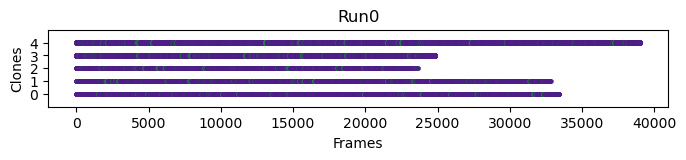

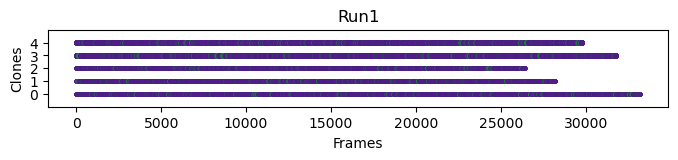

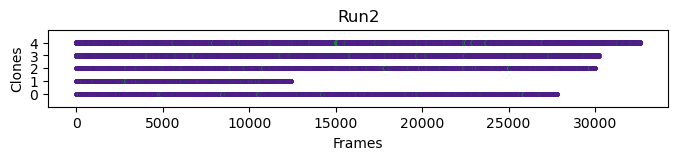

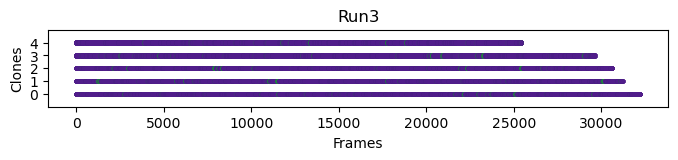

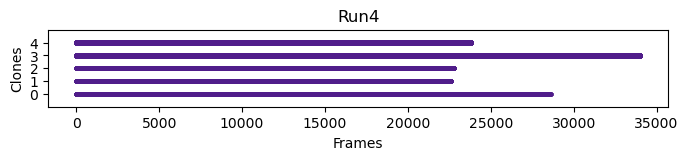

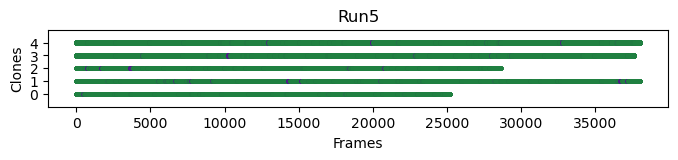

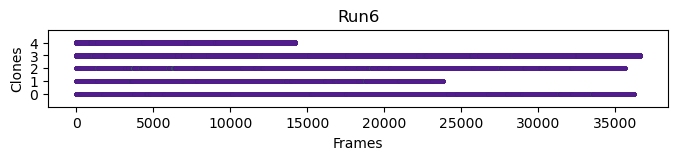

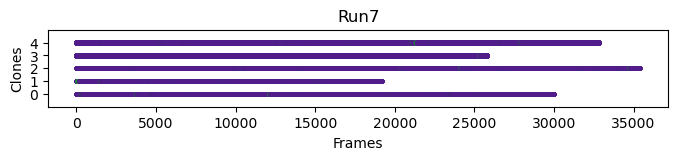

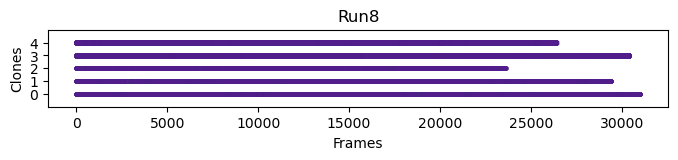

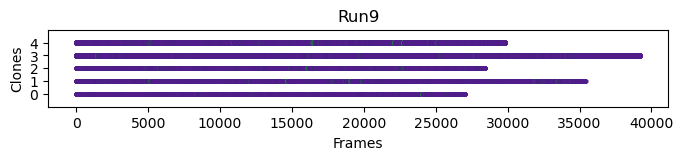

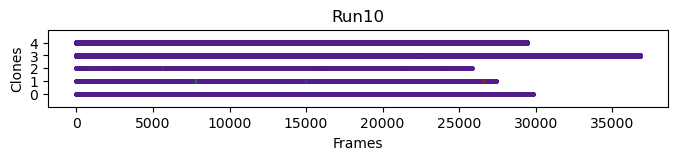

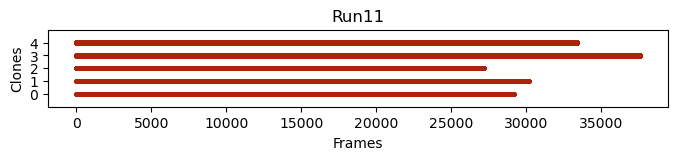

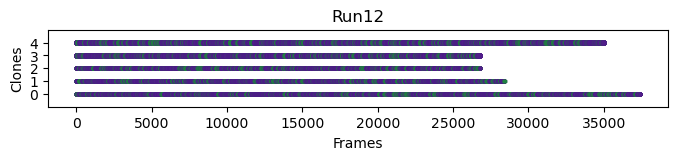

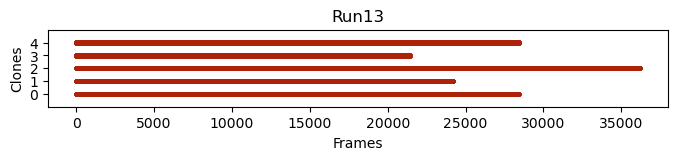

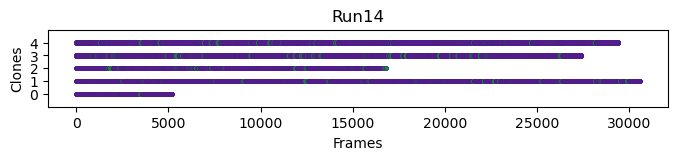

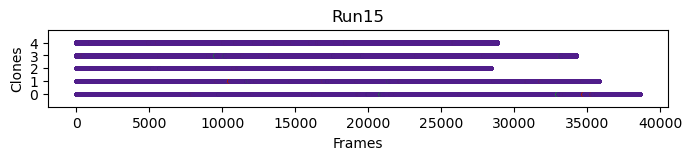

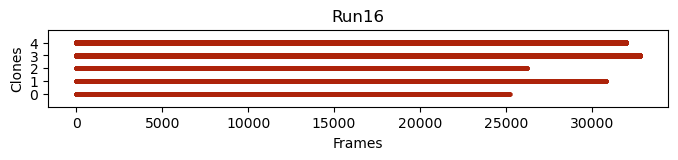

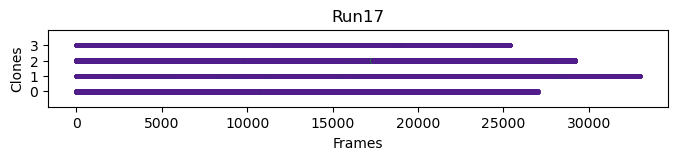

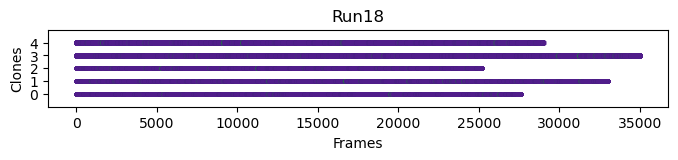

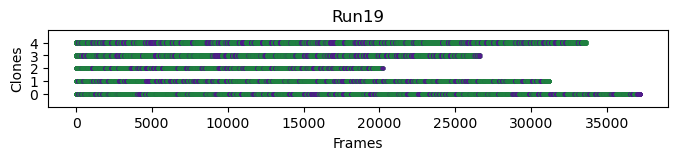

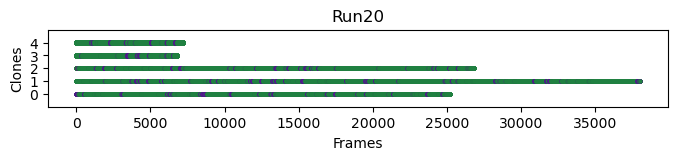

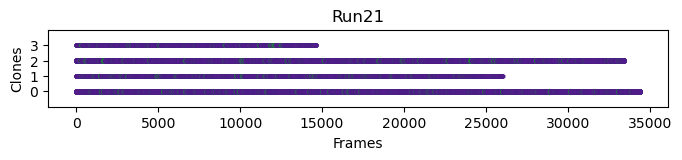

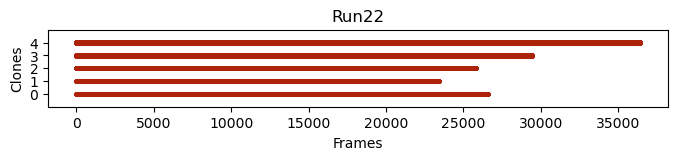

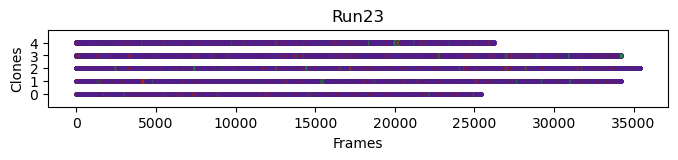

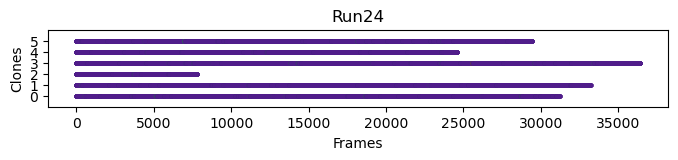

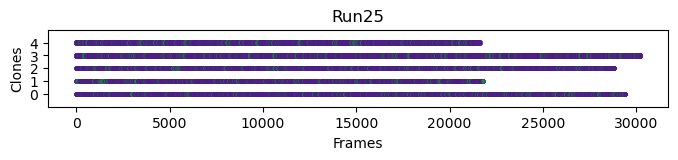

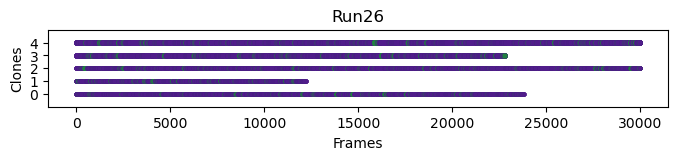

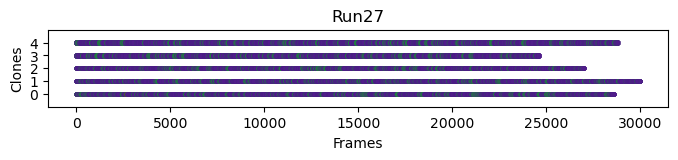

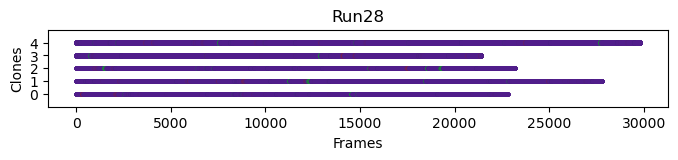

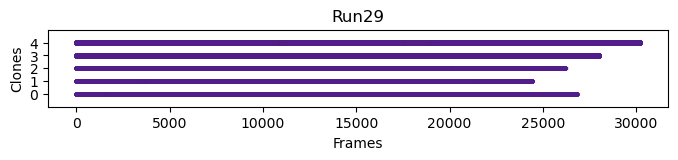

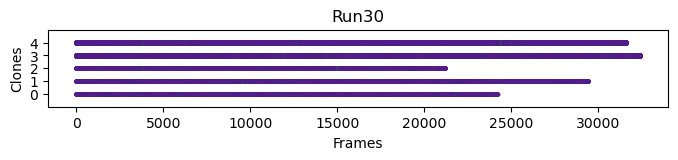

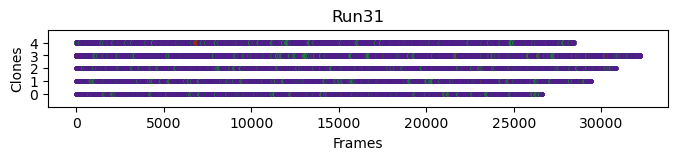

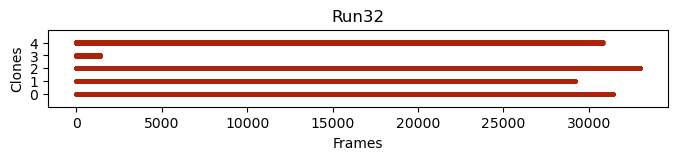

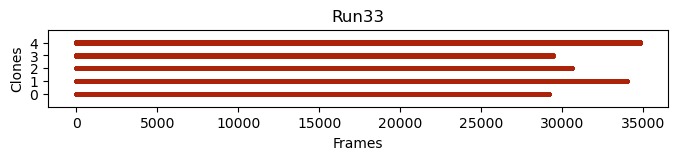

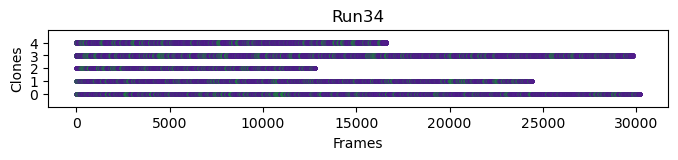

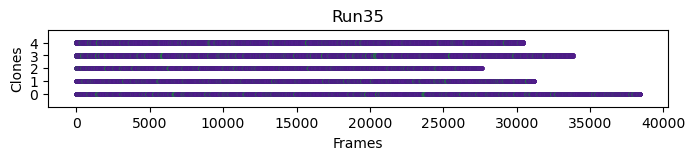

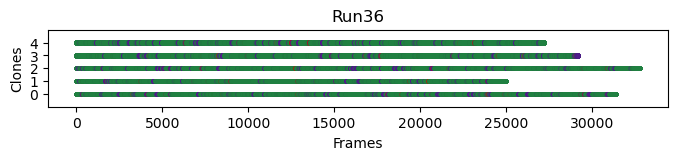

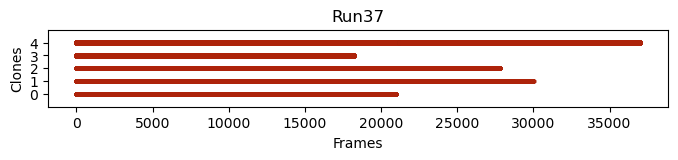

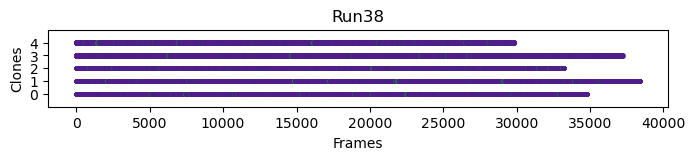

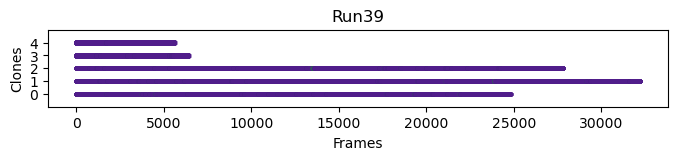

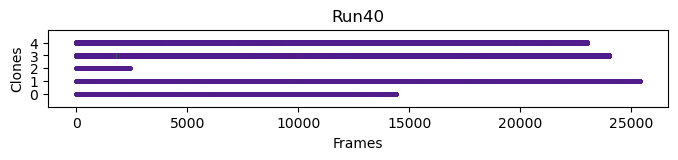

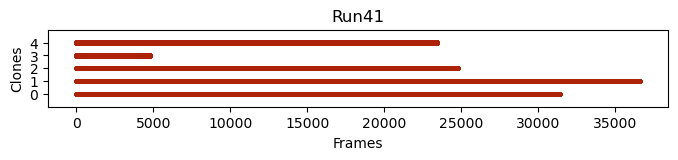

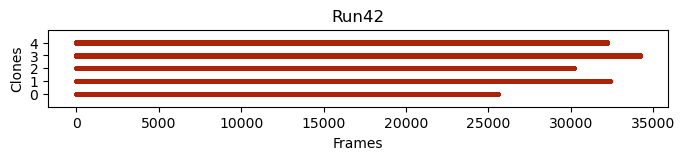

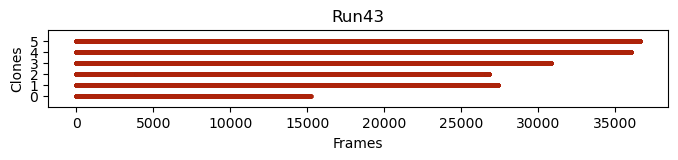

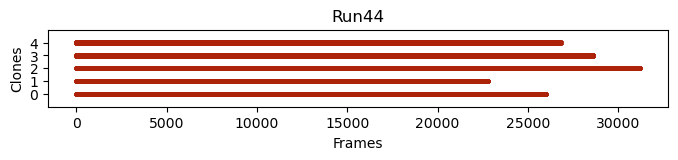

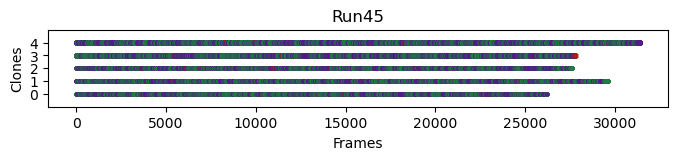

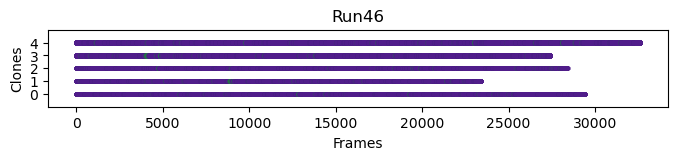

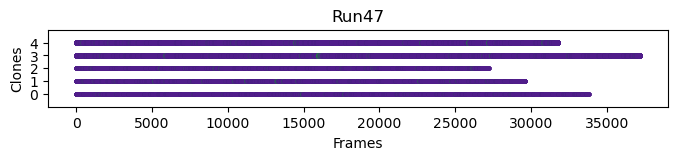

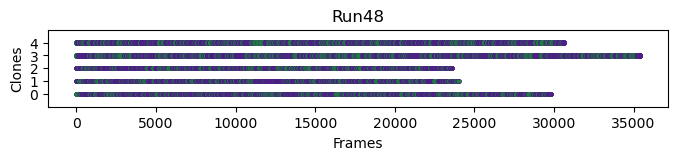

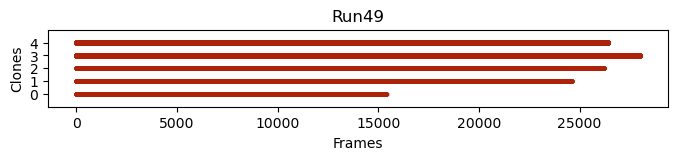

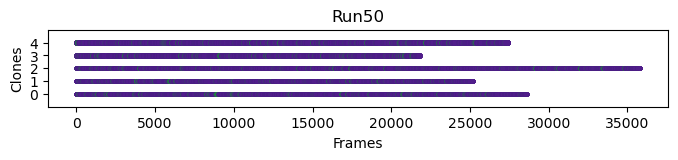

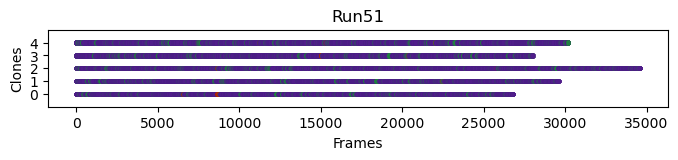

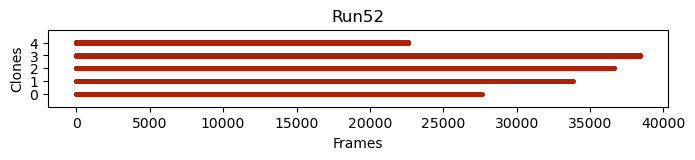

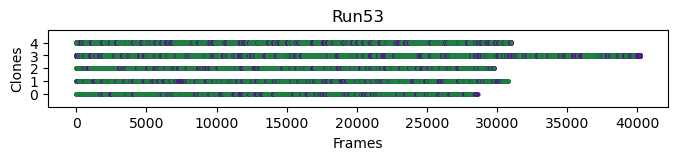

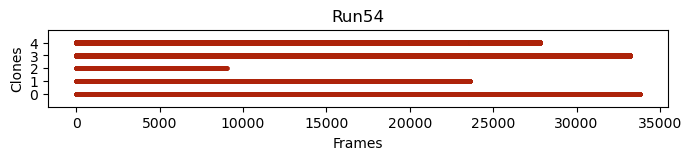

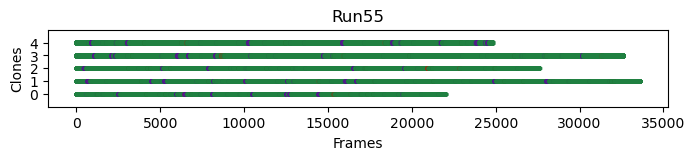

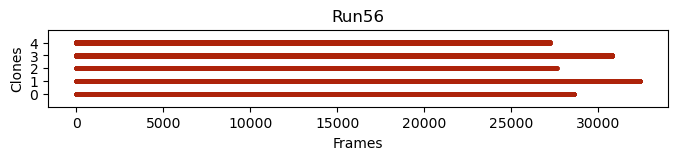

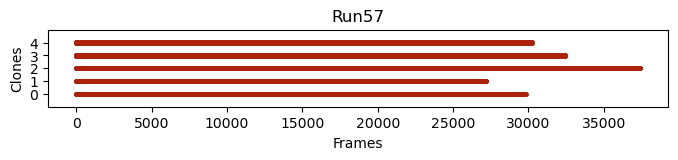

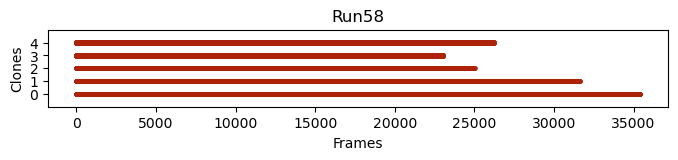

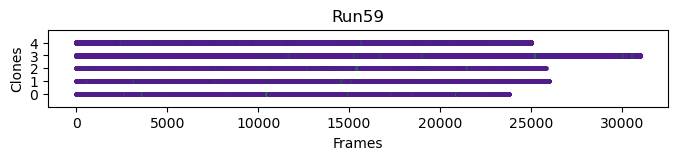

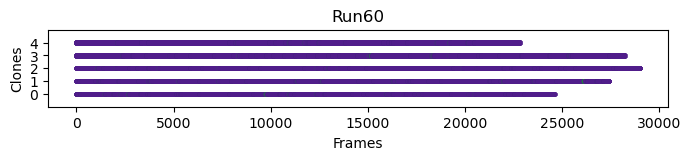

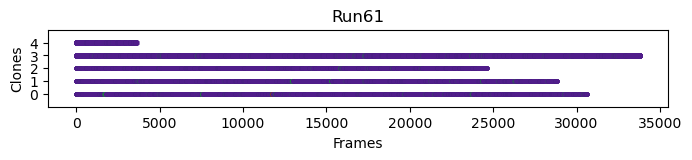

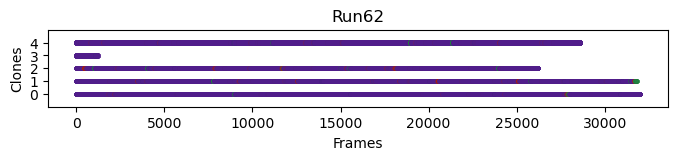

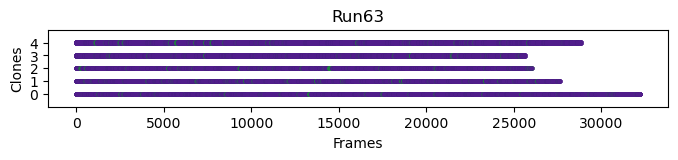

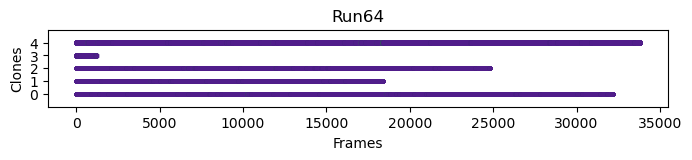

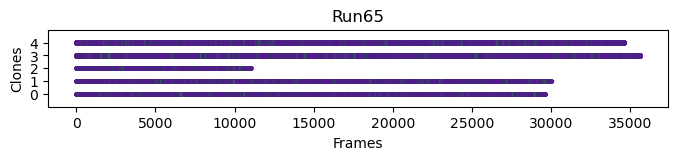

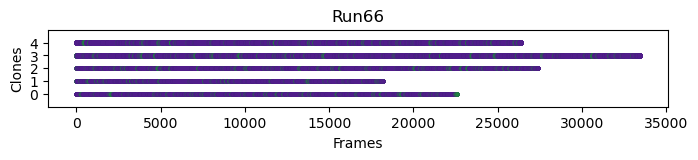

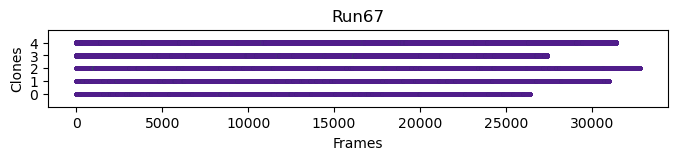

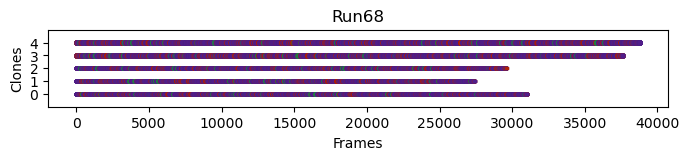

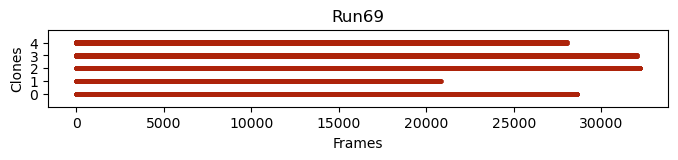

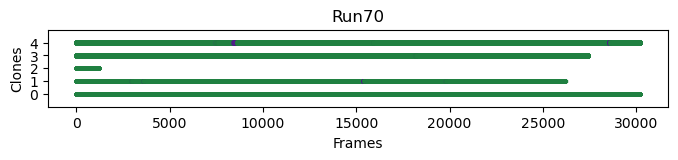

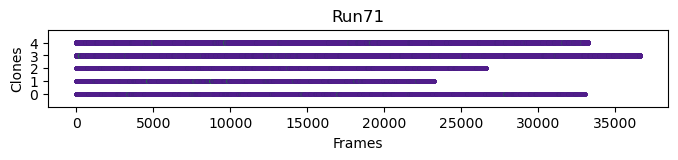

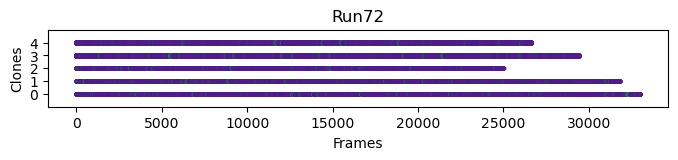

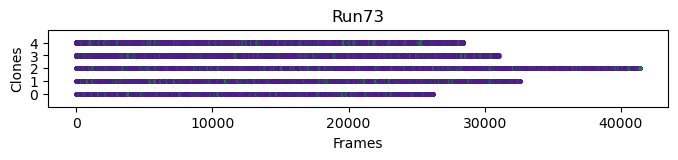

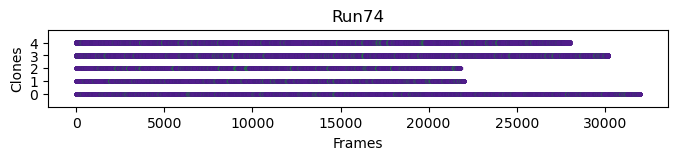

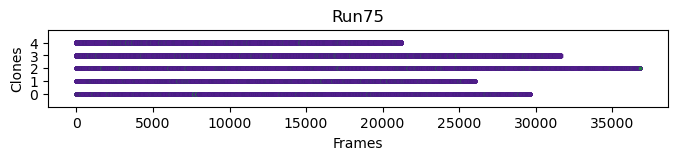

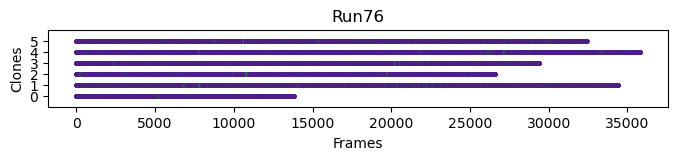

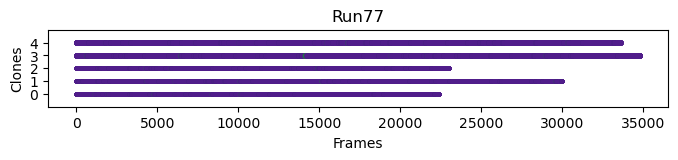

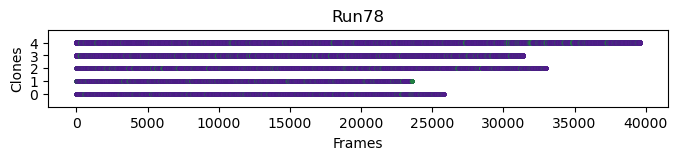

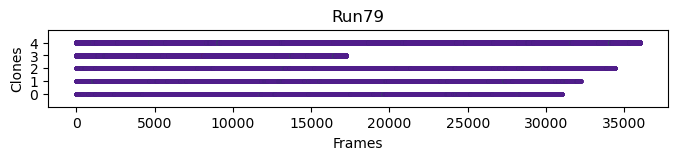

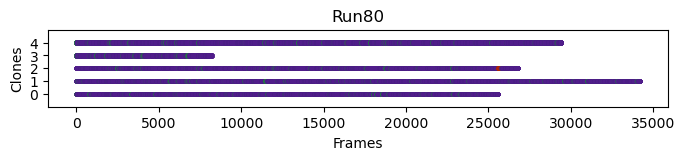

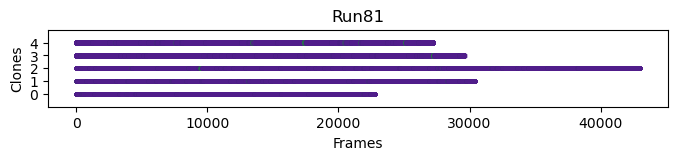

In [50]:
for i in range(total):
    data = []
    for j in range(len(mapping)):
        if f'run{i}' == traj_names[mapping[j]].split('-')[0]:
            data.append(np.array(dist_trajs[j]))
    if len(data) == 0:
        continue
    fig, ax = plt.subplots(figsize=(8, 1))
    for traj, y in zip(data, range(len(data))):
        ax.scatter(np.arange(len(traj)), [y*0.5]*len(traj), c=spatial_colors[traj], s=3, marker='s')
    ax.set_ylim(-0.5, len(data)*0.5)
    ax.set_yticks(np.arange(0, len(data)*0.5, 0.5))
    ax.set_yticklabels(np.arange(0, len(data), 1))
    ax.set_ylabel('Clones')
    ax.set_xlabel('Frames')
    ax.set_title(f'Run{i}')
    plt.show()

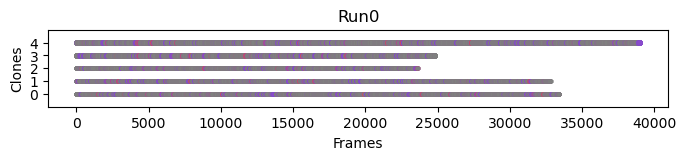

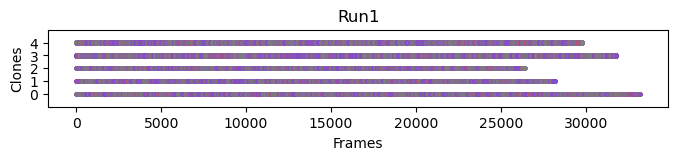

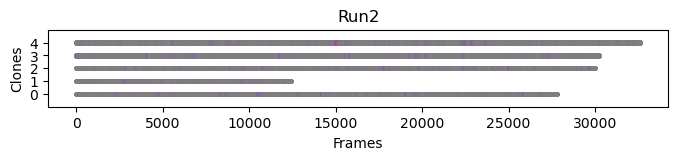

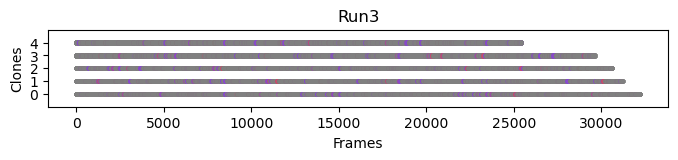

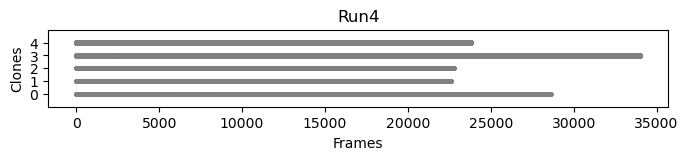

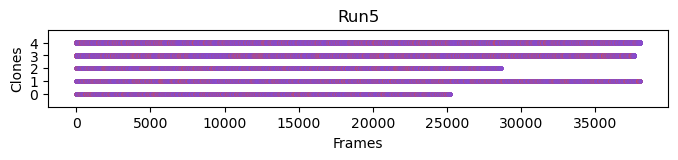

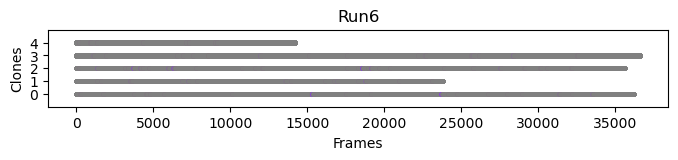

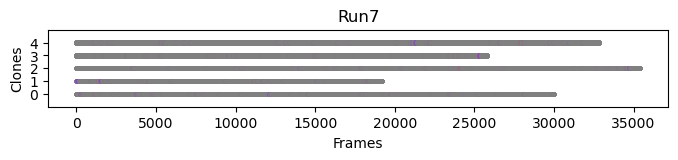

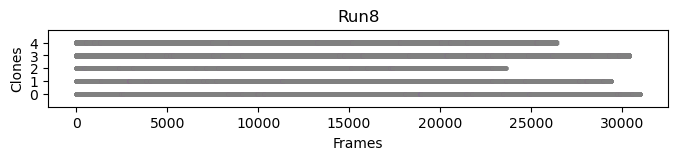

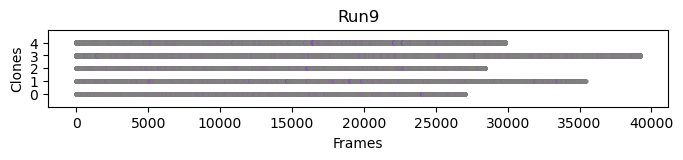

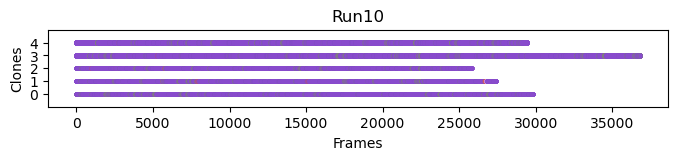

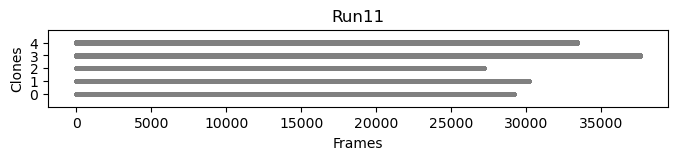

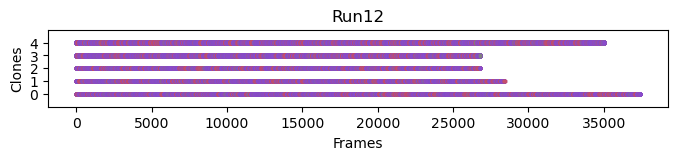

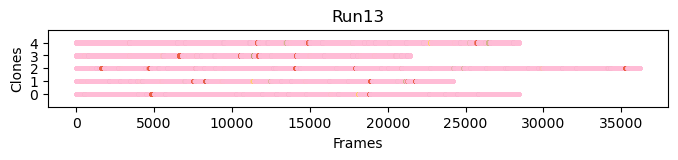

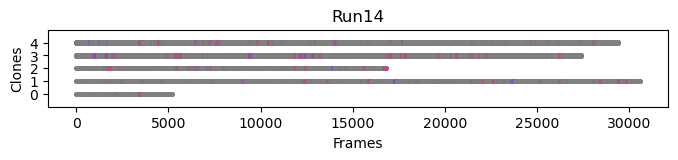

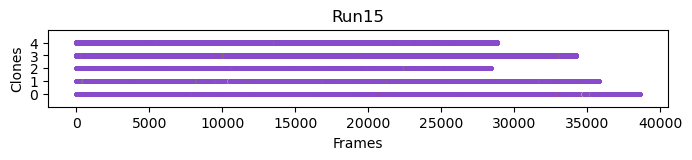

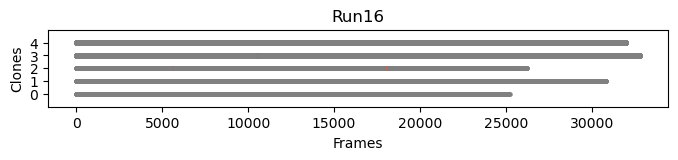

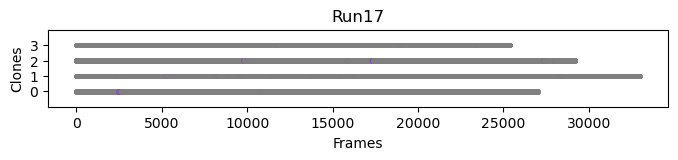

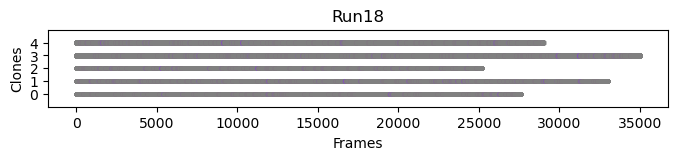

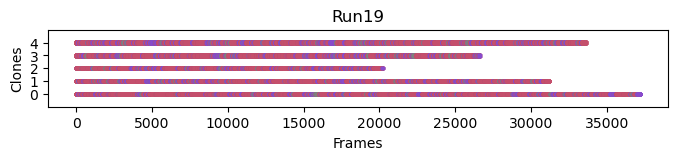

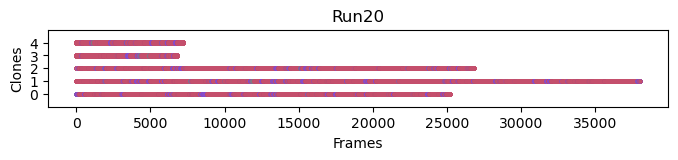

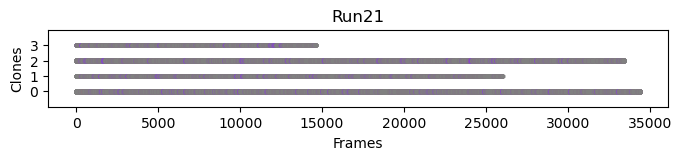

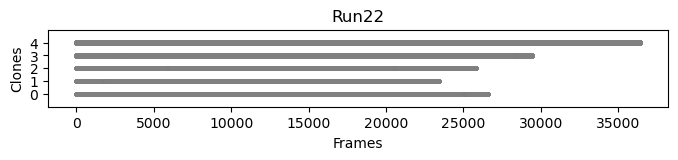

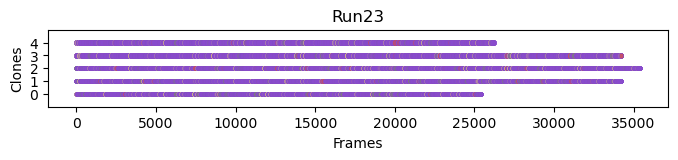

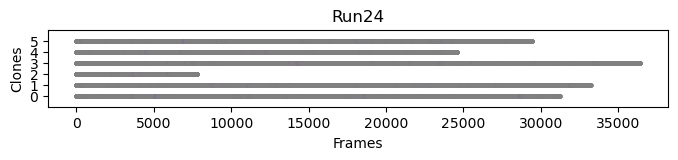

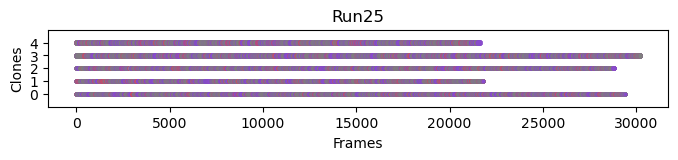

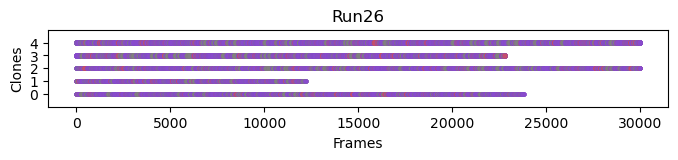

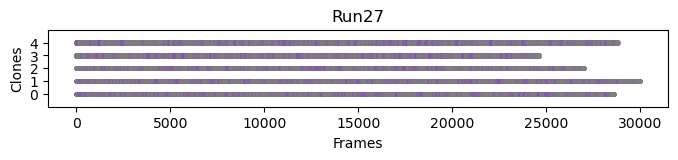

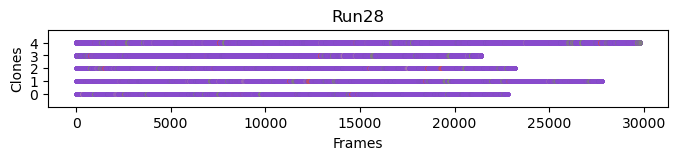

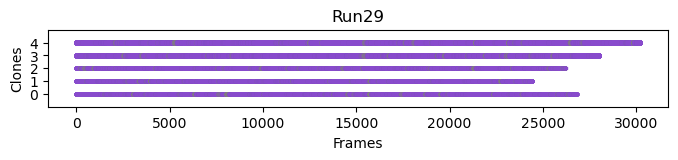

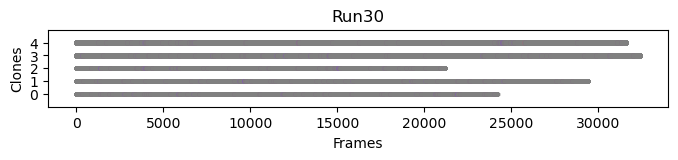

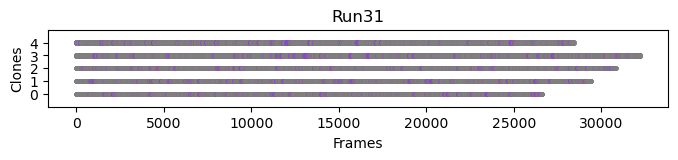

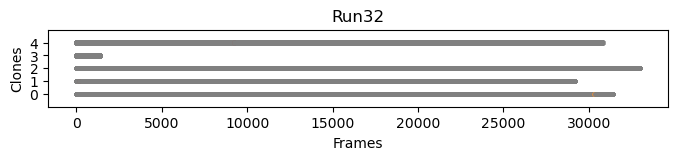

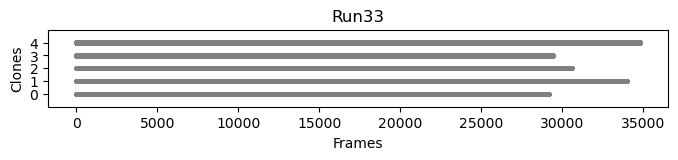

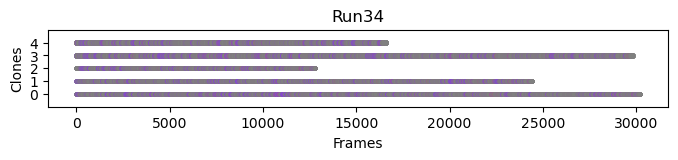

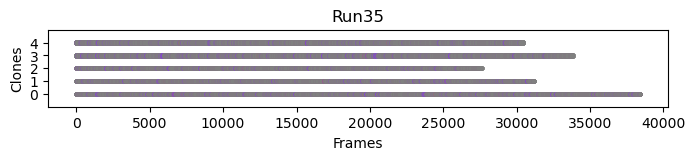

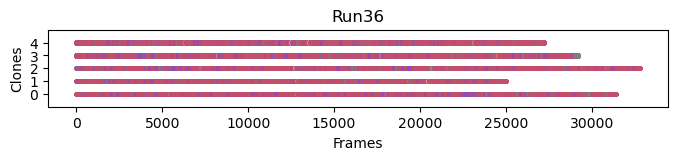

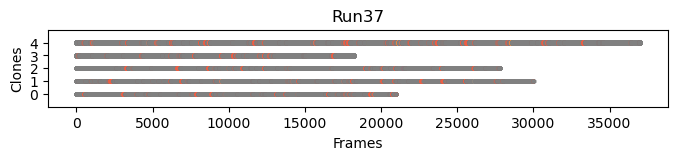

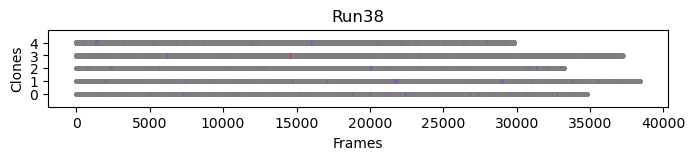

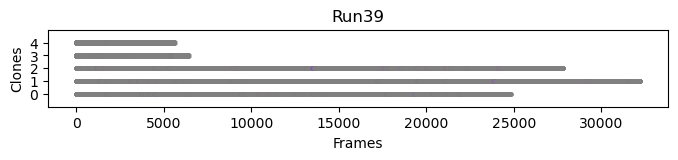

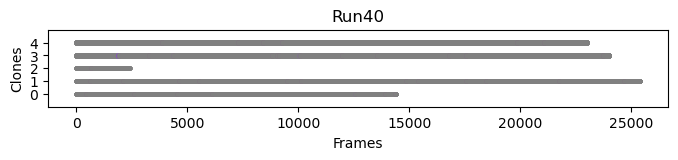

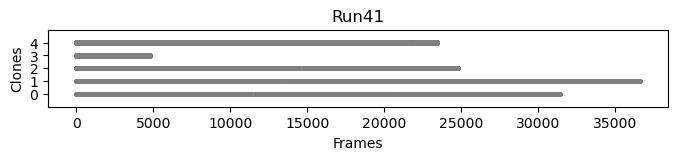

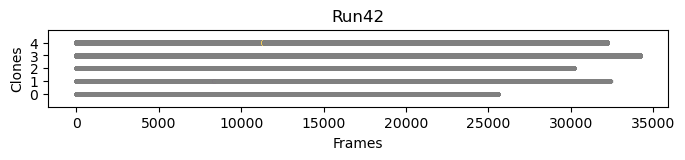

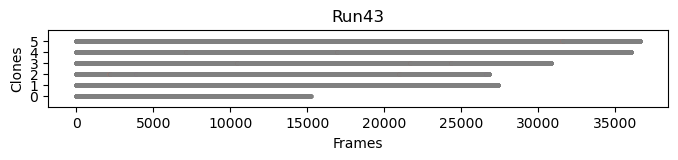

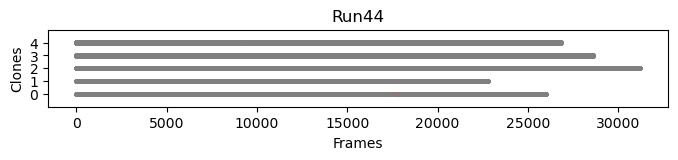

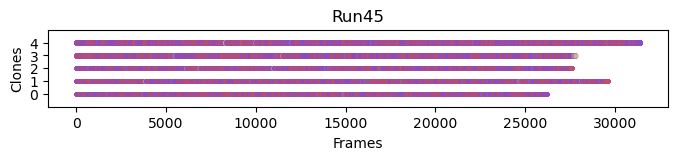

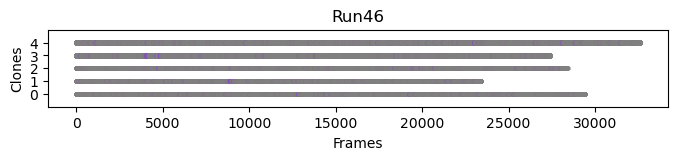

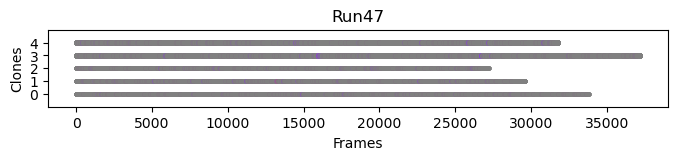

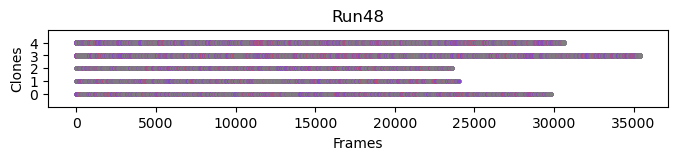

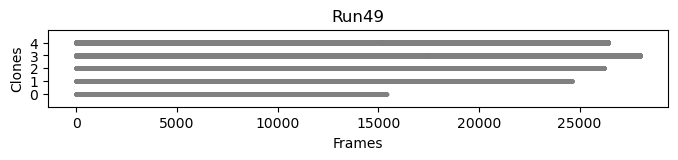

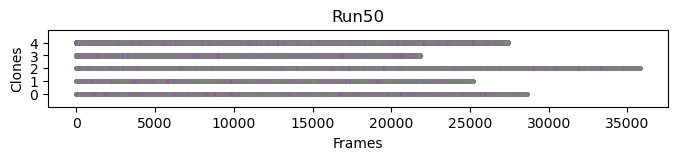

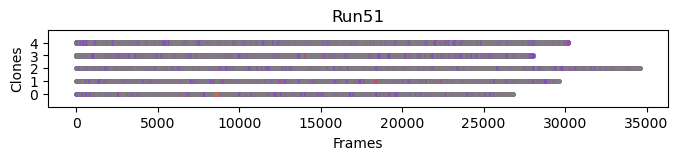

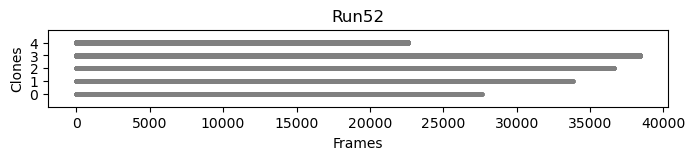

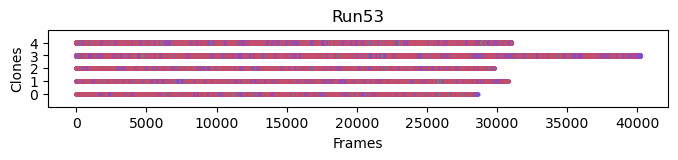

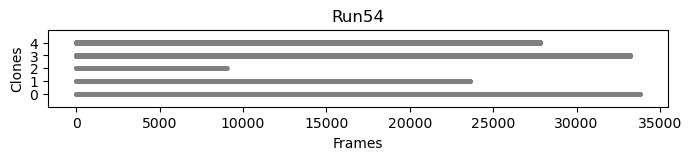

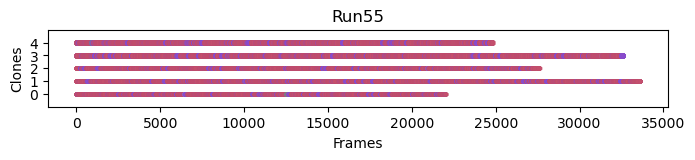

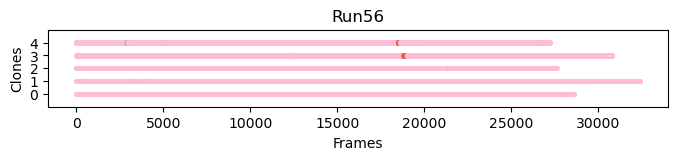

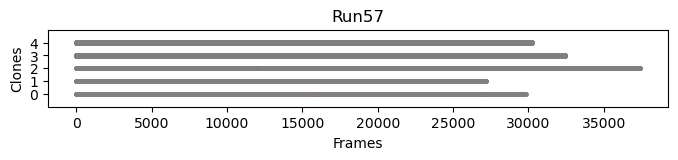

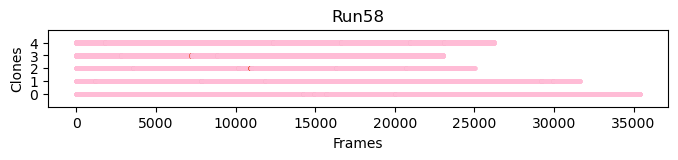

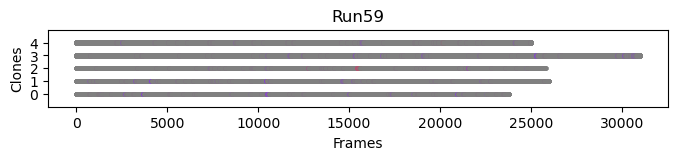

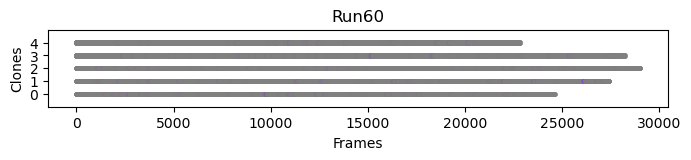

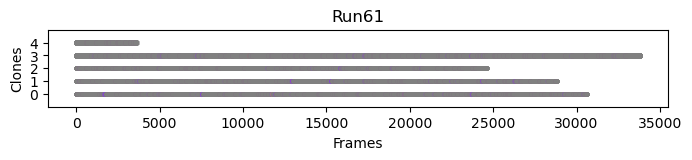

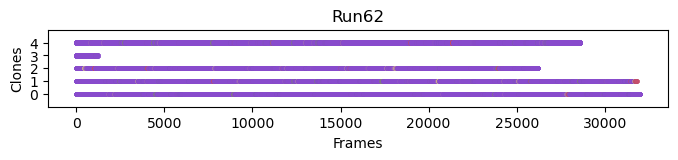

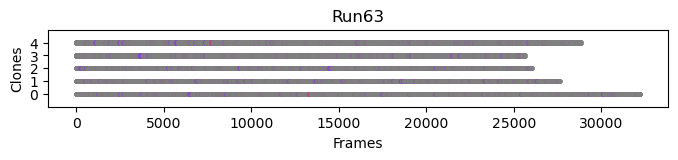

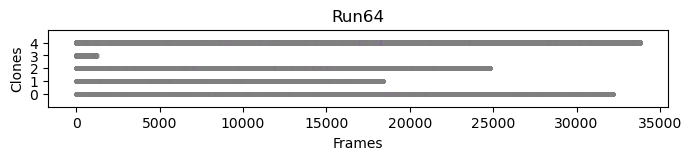

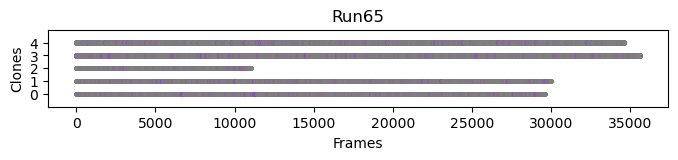

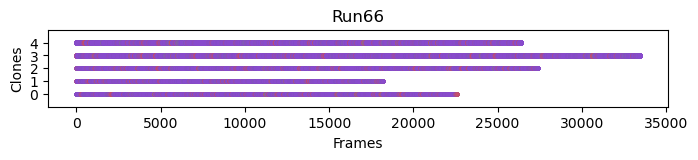

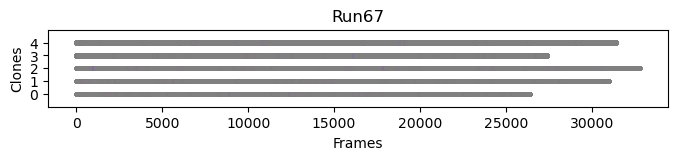

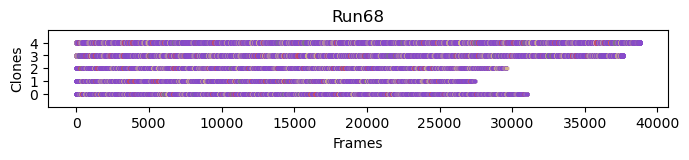

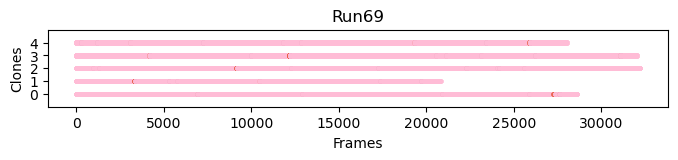

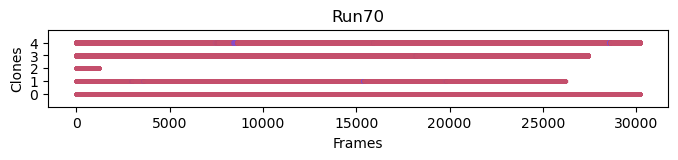

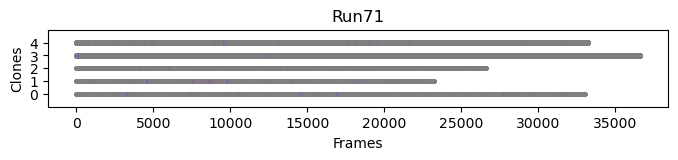

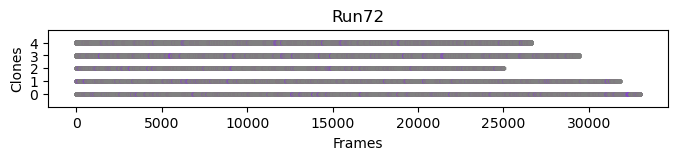

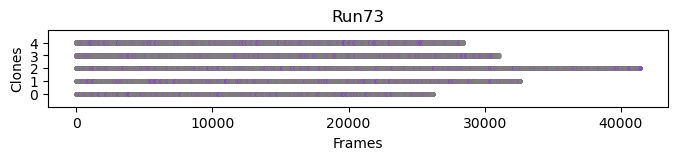

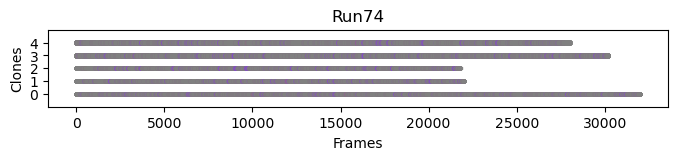

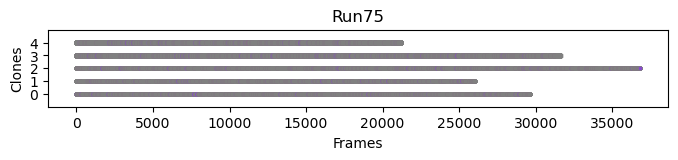

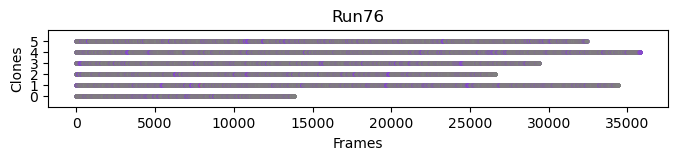

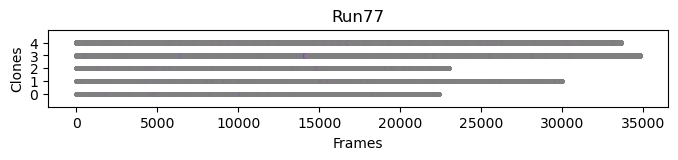

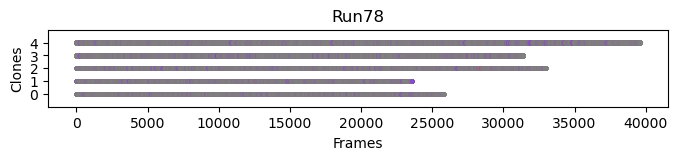

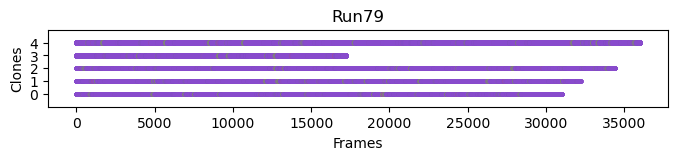

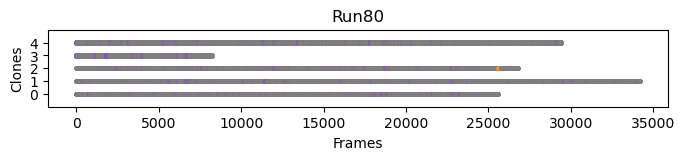

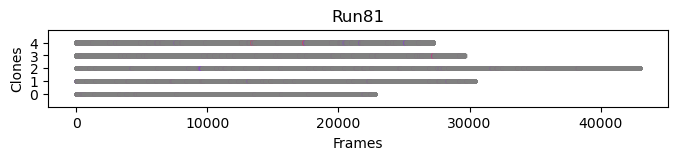

In [51]:
for i in range(total):
    data = []
    for j in range(len(mapping)):
        if f'run{i}' == traj_names[mapping[j]].split('-')[0]:
            data.append(np.array(dihed_trajs[j]))
    if len(data) == 0:
        continue
    fig, ax = plt.subplots(figsize=(8, 1))
    for traj, y in zip(data, range(len(data))):
        ax.scatter(np.arange(len(traj)), [y*0.5]*len(traj), c=dihed_colors[traj], s=3, marker='s')
    ax.set_ylim(-0.5, len(data)*0.5)
    ax.set_yticks(np.arange(0, len(data)*0.5, 0.5))
    ax.set_yticklabels(np.arange(0, len(data), 1))
    ax.set_ylabel('Clones')
    ax.set_xlabel('Frames')
    ax.set_title(f'Run{i}')
    plt.show()